# RevoBank

# Milestone 1

Task

* Provide an overview of the promotion program's performence from RevoBank's perspective.
* Identify different segments of RevoBank credit card users who are RevoShop costumers.
* Discover business opportunities to costumize the rewards progra, for each xostumer segment.

# Import Library

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

# Import Dataset

In [ ]:
#Import dataset csv format from google drive
trx = 'https://drive.google.com/file/d/1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe/view' #assign link to a variable
trx_replace = 'https://drive.google.com/uc?id=' + trx.split('/')[-2] #replace the link

print(trx_replace)

df_trx = pd.read_csv(trx_replace) #Import/read the csv file into pandas dataframe
df_trx.head(5)

https://drive.google.com/uc?id=1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe


,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


In [ ]:
df_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  float64
 8   TXN_CNT_LTM            112634 non-null  float64
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64
 11  LAST_TXN_DAY           112634 non-null  float64
 12  CNT_PROMO_L6M          112634 non-null  float64
 13  CNT_PROMO_L12M         112634 non-null  float64
 14  CUST_VALUE_GROUP       112634 non-nu

Insight to clean the data:

* Change data type ACCOUNT_ID into String
* Change data type BIRTH_DATE into datetime
* Delete duplicate data
* Filter data MCC just '5262-MARKETPLACES'
* Filter data MERCHANT_NAME just 'REVOSHOP' and 'REVOSH MRKTPLC'
* Change 'REVOSH MRKTPLC' into 'REVOSHOP' at MERCHANT_NAME
* Delete data with AVG_PROMO_TXN_AMT_L6M = -1 (because it is missing values) or change the value into = 0



# Data Cleanning

In [ ]:
df_trx_dc = df_trx.copy()
df_trx_dc.head(5)

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


Null data information

In [ ]:
df_trx_dc.isnull().sum()

ACCOUNT_ID               0
MCC                      0
MERCHANT_NAME            0
AVG_TXN_AMT_L6M          0
AVG_TXN_AMT_LTM          0
AVG_PROMO_TXN_AMT_L6M    0
AVG_PROMO_TXN_AMT_LTM    0
TXN_CNT_L6M              0
TXN_CNT_LTM              0
PROMO_TXN_CNT_L6M        0
PROMO_TXN_CNT_LTM        0
LAST_TXN_DAY             0
CNT_PROMO_L6M            0
CNT_PROMO_L12M           0
CUST_VALUE_GROUP         0
MAPP_ACTIVE_GROUP        0
HOMEOWNER_STATUS         0
HOME_VALUE               0
PROXY_INCOME             0
PCT_INCOME_RETIREMENT    0
MOB                      0
FLAG_FEMALE              0
PROMO_CHANNEL            0
BIRTH_DATE               0
dtype: int64

Change data type

In [ ]:
df_trx_dc['ACCOUNT_ID'] = df_trx_dc['ACCOUNT_ID'].astype(str)
df_trx_dc['BIRTH_DATE'] = pd.to_datetime(df_trx_dc['BIRTH_DATE'], format = '%Y-%m-%d')
df_trx_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             112634 non-null  object        
 1   MCC                    112634 non-null  object        
 2   MERCHANT_NAME          112634 non-null  object        
 3   AVG_TXN_AMT_L6M        112634 non-null  float64       
 4   AVG_TXN_AMT_LTM        112634 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64       
 7   TXN_CNT_L6M            112634 non-null  float64       
 8   TXN_CNT_LTM            112634 non-null  float64       
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64       
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64       
 11  LAST_TXN_DAY           112634 non-null  float64       
 12  CNT_PROMO_L6M          112634 non-null  floa

Checking duplicates values

In [ ]:
for column_name in df_trx_dc.columns:
  print(column_name)
  print(df_trx_dc[column_name].value_counts())
  print('\n')

ACCOUNT_ID
100070125    2
100502294    2
100771163    2
100376790    2
100950065    2
            ..
100356812    1
100356810    1
100356795    1
100356780    1
101059869    1
Name: ACCOUNT_ID, Length: 112433, dtype: int64


MCC
5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: MCC, dtype: int64


MERCHANT_NAME
REVOSHOP           91168
REVOSH MKTPLC      19965
TOKTOKLIVE          1500
EL CORTE INGLES        1
Name: MERCHANT_NAME, dtype: int64


AVG_TXN_AMT_L6M
100.0    12373
150.0     4245
50.0      3794
110.0     3533
120.0     2970
         ...  
208.8        1
540.0        1
302.5        1
26.3         1
397.5        1
Name: AVG_TXN_AMT_L6M, Length: 1033, dtype: int64


AVG_TXN_AMT_LTM
100.0    855
50.0     699
90.0     638
80.0     636
70.0     578
        ... 
575.0      1
362.5      1
215.6      1
296.5      1
30.2       1
Name: AVG_TXN_AMT_LTM, Length: 2353, dtype: int64


AVG_PROMO_TXN_AMT_L6M
100.0    17677
50.0      6476
150.0     5958
120.0     4103
200

Cheking duplicate value on ACCOUNT_ID

In [ ]:
df_trx_dc.loc[df_trx_dc['ACCOUNT_ID'].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
169,100000600,5262-MARKETPLACES,TOKTOKLIVE,250.0,131.7,250.0,100.0,2.0,25.0,2.0,...,A,X,1.0,75705.0,48865.0,1.0,129.0,1.0,0.0,1988-05-16
1836,100017966,5262-MARKETPLACES,REVOSH MKTPLC,150.0,78.8,150.0,100.0,3.0,17.0,2.0,...,B,X,1.0,163791.0,87214.0,23.0,92.0,0.0,0.0,1985-02-11
1890,100018465,5262-MARKETPLACES,TOKTOKLIVE,88.0,78.9,86.7,100.0,4.0,17.0,2.0,...,B,X,1.0,64423.0,47589.0,20.0,102.0,1.0,1.0,1972-10-15
3080,100033332,5262-MARKETPLACES,REVOSH MKTPLC,122.5,245.6,50.0,160.0,4.0,21.0,1.0,...,B,X,1.0,227497.0,0.0,24.0,127.0,0.0,1.0,1983-04-21
3653,100038831,5262-MARKETPLACES,TOKTOKLIVE,150.0,206.4,150.0,200.0,2.0,11.0,2.0,...,A,X,1.0,102884.0,72887.0,25.0,105.0,0.0,0.0,1986-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110711,101044177,5262-MARKETPLACES,TOKTOKLIVE,100.0,85.2,100.0,100.0,4.0,22.0,3.0,...,D,X,1.0,68891.0,57264.0,39.0,127.0,0.0,0.0,1987-02-26
110833,101045135,5262-MARKETPLACES,REVOSHOP,100.0,104.3,100.0,100.0,2.0,13.0,2.0,...,D,X,0.0,71314.0,0.0,31.0,51.0,0.0,1.0,1990-02-19
110857,101045627,5262-MARKETPLACES,REVOSHOP,57.3,56.2,50.0,50.0,11.0,34.0,4.0,...,E,X,1.0,53316.0,39696.0,38.0,91.0,0.0,0.0,1987-07-23
110878,101045690,5262-MARKETPLACES,TOKTOKLIVE,106.7,98.8,100.0,130.0,2.0,23.0,1.0,...,E,X,0.0,26290.0,36366.0,36.0,126.0,1.0,0.0,1980-08-18


Drop duplicated data on ACCOUNT_ID

In [ ]:
df_trx_dc = df_trx_dc.drop_duplicates(subset=['ACCOUNT_ID'])
df_trx_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112433 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             112433 non-null  object        
 1   MCC                    112433 non-null  object        
 2   MERCHANT_NAME          112433 non-null  object        
 3   AVG_TXN_AMT_L6M        112433 non-null  float64       
 4   AVG_TXN_AMT_LTM        112433 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  112433 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  112433 non-null  float64       
 7   TXN_CNT_L6M            112433 non-null  float64       
 8   TXN_CNT_LTM            112433 non-null  float64       
 9   PROMO_TXN_CNT_L6M      112433 non-null  float64       
 10  PROMO_TXN_CNT_LTM      112433 non-null  float64       
 11  LAST_TXN_DAY           112433 non-null  float64       
 12  CNT_PROMO_L6M          112433 non-null  floa

Filter Data
* Filter data MCC just '5262-MARKETPLACES'
* Filter data MERCHANT_NAME just 'REVOSHOP' and 'REVOSH MRKTPLC'

In [ ]:
df_trx_dc = df_trx_dc.loc[(df_trx_dc['MCC'] == '5262-MARKETPLACES') & (df_trx_dc['MERCHANT_NAME'].isin(['REVOSH MKTPLC','REVOSHOP']))]
df_trx_dc

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,E,X,0.0,47708.0,0.0,48.0,124.0,0.0,1.0,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29


Change 'REVOSH MRKTPLC' into 'REVOSHOP' at MERCHANT_NAME

In [ ]:
df_trx_dc['MERCHANT_NAME'].value_counts()

REVOSHOP         91082
REVOSH MKTPLC    19947
Name: MERCHANT_NAME, dtype: int64

In [ ]:
df_trx_dc['MERCHANT_NAME'] = df_trx_dc['MERCHANT_NAME'].replace("REVOSH MKTPLC","REVOSHOP")
df_trx_dc

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,E,X,0.0,47708.0,0.0,48.0,124.0,0.0,1.0,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29


Remove AVG_PROMO_TXN_AMT_L6M == -1 (Missing Values)

In [ ]:
df_trx_dc = df_trx_dc.loc[~(df_trx_dc['AVG_PROMO_TXN_AMT_L6M'] == -1)]
df_trx_dc

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,E,X,0.0,47708.0,0.0,48.0,124.0,0.0,1.0,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29


In [ ]:
df_trx_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107556 entries, 0 to 112632
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107556 non-null  object        
 1   MCC                    107556 non-null  object        
 2   MERCHANT_NAME          107556 non-null  object        
 3   AVG_TXN_AMT_L6M        107556 non-null  float64       
 4   AVG_TXN_AMT_LTM        107556 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107556 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107556 non-null  float64       
 7   TXN_CNT_L6M            107556 non-null  float64       
 8   TXN_CNT_LTM            107556 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107556 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107556 non-null  float64       
 11  LAST_TXN_DAY           107556 non-null  float64       
 12  CNT_PROMO_L6M          107556 non-null  floa

Adding PROMO_SENSITIVE coloumn


In [ ]:
# For the lifetime promo-sensitive

# Calculate total sales with and without promo, and the ratio between the two
df_trx_dc['SUM_TXN_AMT_LTM'] = df_trx_dc['AVG_TXN_AMT_LTM'] * df_trx_dc['TXN_CNT_LTM']
df_trx_dc['SUM_PROMO_TXN_AMT_LTM'] = df_trx_dc['AVG_PROMO_TXN_AMT_LTM'] * df_trx_dc['PROMO_TXN_CNT_LTM']
df_trx_dc['R_SALES_PROMO_LTM'] = df_trx_dc['SUM_PROMO_TXN_AMT_LTM']/df_trx_dc['SUM_TXN_AMT_LTM']

# Create a promo-sensitive flags on lifetime basis
df_trx_dc.loc[(df_trx_dc['R_SALES_PROMO_LTM'] > 0.5),'PROMO_SENSITIVE_LTM'] = 'YES' # Promo sensitive customer indicated with 1
df_trx_dc.loc[(df_trx_dc['R_SALES_PROMO_LTM'] <= 0.5),'PROMO_SENSITIVE_LTM'] = 'NO' # Not Promo sensitive customer indicated with 0

<ipython-input-19-bfb854778cec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trx_dc['SUM_TXN_AMT_LTM'] = df_trx_dc['AVG_TXN_AMT_LTM'] * df_trx_dc['TXN_CNT_LTM']
<ipython-input-19-bfb854778cec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trx_dc['SUM_PROMO_TXN_AMT_LTM'] = df_trx_dc['AVG_PROMO_TXN_AMT_LTM'] * df_trx_dc['PROMO_TXN_CNT_LTM']
<ipython-input-19-bfb854778cec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
# For the L6M promo-sensitive

# Calculate total sales with and without promo, and the ratio between the two
df_trx_dc['SUM_TXN_AMT_L6M'] = df_trx_dc['AVG_TXN_AMT_L6M'] * df_trx_dc['TXN_CNT_L6M']
df_trx_dc['SUM_PROMO_TXN_AMT_L6M'] = df_trx_dc['AVG_PROMO_TXN_AMT_L6M'] * df_trx_dc['PROMO_TXN_CNT_L6M']
df_trx_dc['R_SALES_PROMO_L6M'] = df_trx_dc['SUM_PROMO_TXN_AMT_L6M']/df_trx_dc['SUM_TXN_AMT_L6M']

# Create a promo-sensitive flags on 6 month basis
df_trx_dc.loc[(df_trx_dc['R_SALES_PROMO_L6M'] > 0.5),'PROMO_SENSITIVE_L6M'] = 'YES'
df_trx_dc.loc[(df_trx_dc['R_SALES_PROMO_L6M'] <= 0.5),'PROMO_SENSITIVE_L6M'] = 'NO'

df_trx_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107556 entries, 0 to 112632
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107556 non-null  object        
 1   MCC                    107556 non-null  object        
 2   MERCHANT_NAME          107556 non-null  object        
 3   AVG_TXN_AMT_L6M        107556 non-null  float64       
 4   AVG_TXN_AMT_LTM        107556 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107556 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107556 non-null  float64       
 7   TXN_CNT_L6M            107556 non-null  float64       
 8   TXN_CNT_LTM            107556 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107556 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107556 non-null  float64       
 11  LAST_TXN_DAY           107556 non-null  float64       
 12  CNT_PROMO_L6M          107556 non-null  floa

<ipython-input-20-4fa5b98bbf66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trx_dc['SUM_TXN_AMT_L6M'] = df_trx_dc['AVG_TXN_AMT_L6M'] * df_trx_dc['TXN_CNT_L6M']
<ipython-input-20-4fa5b98bbf66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trx_dc['SUM_PROMO_TXN_AMT_L6M'] = df_trx_dc['AVG_PROMO_TXN_AMT_L6M'] * df_trx_dc['PROMO_TXN_CNT_L6M']
<ipython-input-20-4fa5b98bbf66>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
df_trx_dc['PROMO_SENSITIVE'].value_counts()

YES    73388
NO     34168
Name: PROMO_SENSITIVE, dtype: int64

In [ ]:
df_trx_dc['PROMO_SENSITIVE_L6M'].value_counts()

YES    72021
NO     35535
Name: PROMO_SENSITIVE_L6M, dtype: int64

# Exploratory Data Analysis

Statistic Descriptive

Integer or Float EDA

In [ ]:
desc_eda = df_trx_dc.describe()
desc_eda.loc['kurtosis'] = df_trx_dc.kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_trx_dc.skew() #show Skewness statistic
desc_eda.loc['variance'] = df_trx_dc.var() #show variance statistic
desc_eda.round(2)

<ipython-input-24-42c1f6e92c50>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  desc_eda.loc['kurtosis'] = df_trx_dc.kurt() #show kurtosis statistic
<ipython-input-24-42c1f6e92c50>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  desc_eda.loc['skewness'] = df_trx_dc.skew() #show Skewness statistic
<ipython-input-24-42c1f6e92c50>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only va

,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,...,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,SUM_TXN_AMT_LTM,SUM_PROMO_TXN_AMT_LTM,R_SALES_PROMO_LTM,SUM_TXN_AMT_L6M,SUM_PROMO_TXN_AMT_L6M,R_SALES_PROMO_L6M
count,107556.00,107556.00,107556.00,107556.00,107556.00,107556.00,107556.00,107556.00,107556.00,107556.00,...,107556.00,107556.00,107556.00,107556.00,107556.00,107556.00,107556.00,107556.00,107556.00,107556.00
mean,126.80,106.82,125.70,119.83,4.52,20.16,2.82,10.37,18.30,5.74,...,31.01,101.21,0.59,0.30,2058.83,1212.24,0.60,526.14,327.06,0.63
std,79.84,75.30,80.39,76.66,2.31,8.96,1.71,4.40,4.15,1.41,...,12.05,25.65,0.49,0.46,1555.54,902.70,0.19,378.30,262.23,0.23
min,11.50,17.30,3.20,3.20,1.00,3.00,1.00,1.00,2.00,0.00,...,0.00,21.00,0.00,0.00,262.50,9.60,0.02,35.00,3.20,0.02
25%,83.30,69.30,80.00,80.00,3.00,14.00,1.00,7.00,16.00,5.00,...,25.00,81.00,0.00,0.00,1210.00,660.00,0.46,300.00,150.00,0.48
50%,108.00,92.60,104.30,100.00,4.00,18.00,2.00,10.00,18.00,6.00,...,31.00,105.00,1.00,0.00,1659.20,1000.00,0.60,430.00,258.50,0.63
75%,150.00,123.80,150.00,150.00,6.00,24.00,4.00,12.00,21.00,6.00,...,38.00,125.00,1.00,1.00,2430.40,1500.00,0.75,641.50,405.00,0.79
max,2000.00,3010.00,2000.00,2500.00,18.00,127.00,10.00,46.00,28.00,21.00,...,100.00,570.00,1.00,1.00,52751.00,25950.00,1.00,8500.00,5400.00,1.00
kurtosis,46.91,277.38,40.15,78.18,0.82,6.11,0.68,1.62,2.14,6.37,...,1.35,1.96,-1.88,-1.24,124.60,63.00,-0.67,30.60,22.71,-0.83
skewness,4.39,10.51,4.13,5.21,0.91,1.87,1.03,1.06,-0.81,0.99,...,-0.25,-0.29,-0.35,0.87,6.58,4.41,-0.04,3.60,3.25,0.08


String EDA

In [ ]:
objects = ['MCC',
 'MERCHANT_NAME',
 'CUST_VALUE_GROUP',
 'MAPP_ACTIVE_GROUP']
df_trx_dc[objects].describe()

,MCC,MERCHANT_NAME,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP
count,107556,107556,107556,107556
unique,1,1,5,3
top,5262-MARKETPLACES,REVOSHOP,E,X
freq,107556,107556,44489,100046


a. How much total sales have been generated in RevosShop over the past 6 months?

In [ ]:
Total_sales_6m = df_trx_dc['AVG_TXN_AMT_L6M']*df_trx_dc['TXN_CNT_L6M']
Total_sales_6m = Total_sales_6m.sum()
print(f'Total sales have been generated in RevoShop over the past 6 months: {Total_sales_6m:,.0f}')

Total sales have been generated in RevoShop over the past 6 months: 56,589,100


b. How many sales were made in response to the promo in the last 6 months?

In [ ]:
Total_promo_sales_6m = df_trx_dc['AVG_PROMO_TXN_AMT_L6M']*df_trx_dc['PROMO_TXN_CNT_L6M']
Total_promo_sales_6m = Total_promo_sales_6m.sum()
print(f'Total sales were made in response to the promo in RevoShop over the past 6 months: {Total_promo_sales_6m:,.0f}')

Total sales were made in response to the promo in RevoShop over the past 6 months: 35,176,822


Percentage of sales on promo

In [ ]:
Percentage_sales_promo = (Total_promo_sales_6m/Total_sales_6m) *100
print(f'Percentage of sales on promo to the total sales : {Percentage_sales_promo:,.0f}%')

Percentage of sales on promo to the total sales : 62%


c. What is the total cost of the promotion over the past 6 months?

In [ ]:
Total_cost_promo_6m = (df_trx_dc['PROMO_TXN_CNT_L6M'].sum()) * 1.5
Total_cost_promo_6m

455691.0

d. Total revenue on 6 months?

In [ ]:
Total_revenue = Total_sales_6m * 0.024
print(f'Rotal revenue on 6 months: {Total_revenue:,.0f} Euro')

Rotal revenue on 6 months: 1,358,138 Euro


e. How many customers are considered promo-sensitive?

In [ ]:
cust_promo_sensitive = len(df_trx_dc[df_trx_dc['PROMO_SENSITIVE'] == 'Yes'])
print(f'Total customers that sensitive on promo: {cust_promo_sensitive:,.0f}')

Total customers that sensitive on promo: 0


In [ ]:
df_trx_dc['PROMO_SENSITIVE'].value_counts(normalize=True)

YES    0.682324
NO     0.317676
Name: PROMO_SENSITIVE, dtype: float64

# Trend

a. Is there any difference in trsansaction behavior and promo-sensitivity between active and inactive customers in the past 6 months?

In [ ]:
df_trx_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107556 entries, 0 to 112632
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107556 non-null  object        
 1   MCC                    107556 non-null  object        
 2   MERCHANT_NAME          107556 non-null  object        
 3   AVG_TXN_AMT_L6M        107556 non-null  float64       
 4   AVG_TXN_AMT_LTM        107556 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107556 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107556 non-null  float64       
 7   TXN_CNT_L6M            107556 non-null  float64       
 8   TXN_CNT_LTM            107556 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107556 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107556 non-null  float64       
 11  LAST_TXN_DAY           107556 non-null  float64       
 12  CNT_PROMO_L6M          107556 non-null  floa

MAPP_ACTIVE_GROUP
Status of account activity in the bank's mobile app (e.g. opening the app, conduct transactions via app, etc):
- X: High activity in mobile app
- Y: Average activity
- Z: Low activity

So we can conclude that X & Y is active customers and Z is inactive customers

Compare the number of customers

In [ ]:
df_trx_dc.loc[(df_trx_dc['MAPP_ACTIVE_GROUP'] == 'Z'),'ACTIVITY'] = 'INACTIVE'
df_trx_dc.loc[~(df_trx_dc['MAPP_ACTIVE_GROUP'] == 'Z'),'ACTIVITY'] = 'ACTIVE'
df_trx_dc

<ipython-input-34-60d2802749b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trx_dc.loc[(df_trx_dc['MAPP_ACTIVE_GROUP'] == 'Z'),'ACTIVITY'] = 'INACTIVE'


,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,SUM_TXN_AMT_LTM,SUM_PROMO_TXN_AMT_LTM,R_SALES_PROMO_LTM,PROMO_SENSITIVE,SUM_TXN_AMT_L6M,SUM_PROMO_TXN_AMT_L6M,R_SALES_PROMO_L6M,PROMO_SENSITIVE_L6M,PROMO_SENSITIVE_LTM,ACTIVITY
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,4221.0,1750.0,0.414594,NO,1080.0,400.0,0.370370,NO,NO,ACTIVE
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,2510.2,1500.0,0.597562,YES,429.9,280.0,0.651314,YES,YES,ACTIVE
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,2912.4,1160.0,0.398297,NO,1053.2,800.0,0.759590,YES,NO,ACTIVE
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,5670.0,3900.0,0.687831,YES,1884.8,1457.4,0.773239,YES,YES,ACTIVE
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,3410.0,1890.0,0.554252,YES,490.0,390.0,0.795918,YES,YES,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,1010.4,500.0,0.494854,NO,200.0,200.0,1.000000,YES,NO,ACTIVE
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,2494.8,1000.0,0.400834,NO,360.0,120.0,0.333333,NO,NO,ACTIVE
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,1030.4,840.0,0.815217,YES,370.3,140.1,0.378342,NO,YES,ACTIVE
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,3387.9,2000.0,0.590336,YES,585.0,380.0,0.649573,YES,YES,ACTIVE


In [ ]:
activity = df_trx_dc['ACTIVITY'].value_counts()
activity = pd.DataFrame({'ACTIVITY': activity.index, 'TOTAL': activity.values})
activity

,ACTIVITY,TOTAL
0,ACTIVE,107075
1,INACTIVE,481


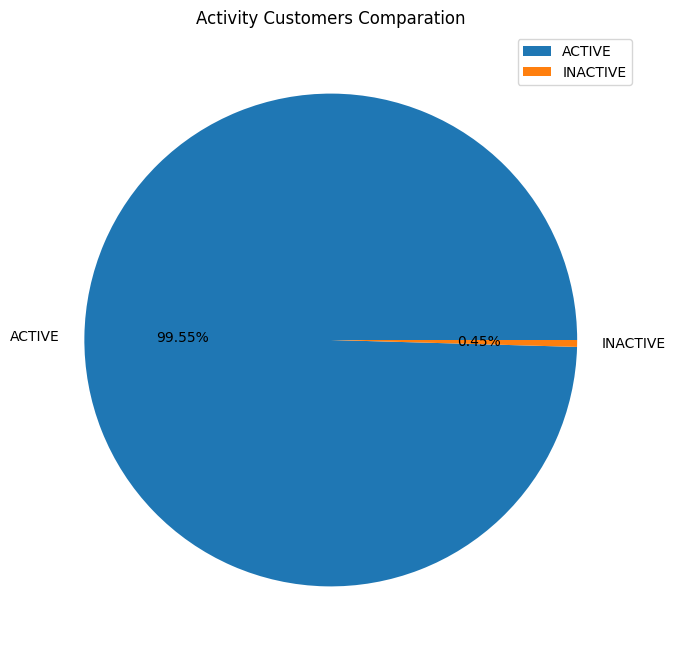

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(1,1,figsize=(8,8))
# Then, we draw charts on the axis.
ax.pie(activity['TOTAL'], labels=activity['ACTIVITY'], autopct='%1.2f%%')
# We can set many attribute of the axes, including title & legend
ax.set_title('Activity Customers Comparation')
ax.legend()
# Then we end the chart by showing the figure
fig.show()

Promo-sensitive customers

In [ ]:
sensitivity = df_trx_dc['PROMO_SENSITIVE_L6M'].value_counts()
sensitivity = pd.DataFrame({'PROMO_SENSITIVE_L6M': sensitivity.index, 'TOTAL': sensitivity.values})
sensitivity

,PROMO_SENSITIVE_L6M,TOTAL
0,YES,72021
1,NO,35535


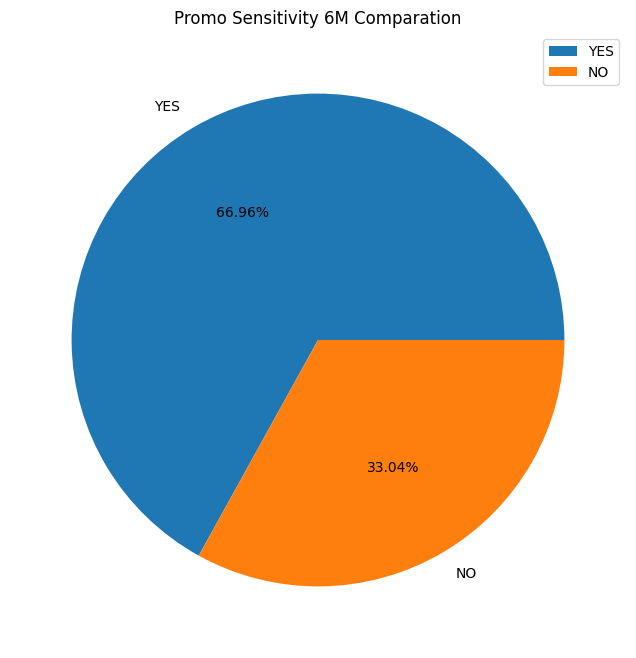

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(1,1,figsize=(8,8))
# Then, we draw charts on the axis.
ax.pie(sensitivity['TOTAL'], labels=sensitivity['PROMO_SENSITIVE_L6M'], autopct='%1.2f%%')
# We can set many attribute of the axes, including title & legend
ax.set_title('Promo Sensitivity 6M Comparation')
ax.legend()
# Then we end the chart by showing the figure
fig.show()

Interpretation :

Mostly customers are promo sensitive (66.96%)

Average transaction amount

In [ ]:
Avg_sales_6m_group = df_trx_dc.groupby(['ACTIVITY'])['SUM_TXN_AMT_L6M'].mean()
Avg_sales_6m_group = pd.DataFrame({'ACTIVITY': Avg_sales_6m_group.index, 'MEAN': Avg_sales_6m_group.values})
Avg_sales_6m_group

,ACTIVITY,MEAN
0,ACTIVE,525.560952
1,INACTIVE,654.180457


Interpretation :

Customers grouping by activity has significant difference on their average sales between active customers and inactive customers.

Inactive customers give better sales more than active customers.

Average transaction count per customers for each customer group

In [ ]:
Avg_count_cust_6m_group = df_trx_dc.groupby(['ACTIVITY'])['TXN_CNT_L6M'].mean()
Avg_count_cust_6m_group = pd.DataFrame({'ACTIVITY': Avg_count_cust_6m_group.index, 'MEAN': Avg_count_cust_6m_group.values})
Avg_count_cust_6m_group

,ACTIVITY,MEAN
0,ACTIVE,4.521746
1,INACTIVE,5.197505


Interpretation :

Customers grouping by activity has not significant difference on their average transaction between active customers and inactive customers

Recap Aggregation

In [ ]:
customer_activity = df_trx_dc.groupby(['ACTIVITY','PROMO_SENSITIVE_L6M']).agg({
    'SUM_TXN_AMT_L6M' : ['mean'],
    'TXN_CNT_L6M' : ['mean'],
    'SUM_PROMO_TXN_AMT_L6M' : ['mean'],
    'PROMO_TXN_CNT_L6M' : ['mean']
})
customer_activity.columns = ['SUM_TXN_AMT_L6M','TXN_CNT_L6M','SUM_PROMO_TXN_AMT_L6M','PROMO_TXN_CNT_L6M']
customer_activity = customer_activity.reset_index()
customer_activity

,ACTIVITY,PROMO_SENSITIVE_L6M,SUM_TXN_AMT_L6M,TXN_CNT_L6M,SUM_PROMO_TXN_AMT_L6M,PROMO_TXN_CNT_L6M
0,ACTIVE,NO,503.306092,4.173763,189.808399,1.679113
1,ACTIVE,YES,536.517324,4.693064,394.340158,3.387995
2,INACTIVE,NO,592.704265,4.895735,184.975355,1.848341
3,INACTIVE,YES,702.222963,5.433333,513.703333,3.700000


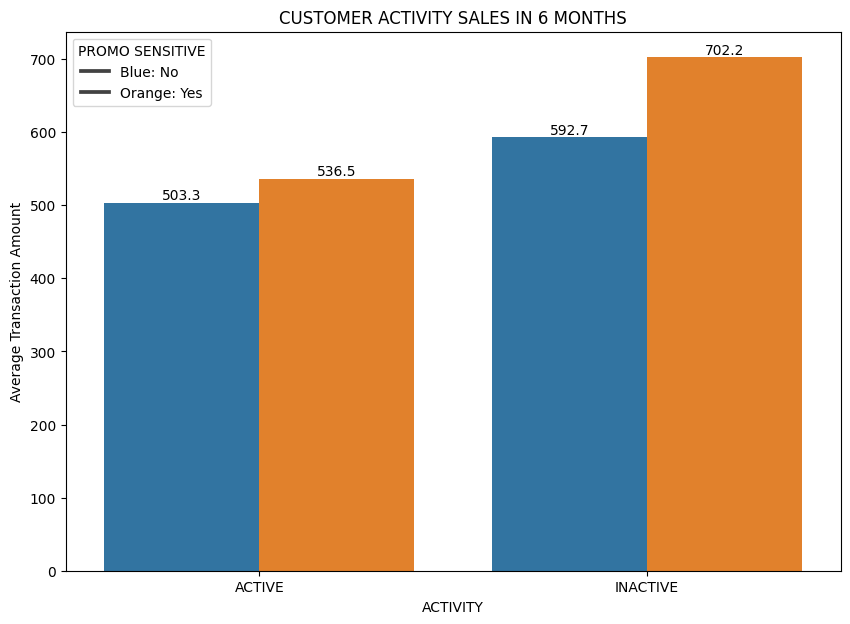

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x='ACTIVITY', y='SUM_TXN_AMT_L6M', hue='PROMO_SENSITIVE_L6M', data=customer_activity)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.title('CUSTOMER ACTIVITY SALES IN 6 MONTHS')
plt.xlabel('ACTIVITY')
plt.ylabel('Average Transaction Amount')
plt.legend(title='PROMO SENSITIVE', loc='upper left', labels=['Blue: No', 'Orange: Yes'])
plt.show()

Interpretation :
* Inactive customers with not promo sensitive has the higest impact to sales
*  Active customers with promo sensitive or not have not significant difference to the sales

Solution :

We have to increase the number of sales  the active and sensitive with promo customers.

b. Is there a relationship between increasing the number of email and SMS message and improved sales preformance?

Additional Notes :
* 1 = if account holder received communication via e-mail
* 0 = if account holder received communcation via SMS


In [ ]:
channel = df_trx_dc['SUM_TXN_AMT_L6M'].groupby(df_trx_dc['PROMO_CHANNEL']).mean()
channel = pd.DataFrame({'PROMO_CHANNEL': channel.index, 'MEAN': channel.values})
channel

,PROMO_CHANNEL,MEAN
0,0.0,527.613906
1,1.0,522.697377


In [ ]:
channel_count = df_trx_dc['PROMO_CHANNEL'].value_counts()
channel_count = pd.DataFrame({'PROMO_CHANNEL': channel_count.index, 'TOTAL': channel_count.values})
channel_count

,PROMO_CHANNEL,TOTAL
0,0.0,75228
1,1.0,32328


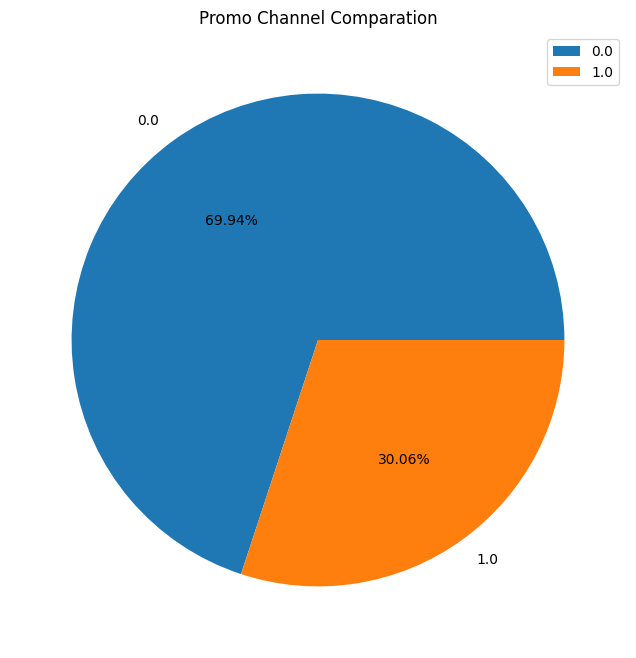

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(1,1,figsize=(8,8))
# Then, we draw charts on the axis.
ax.pie(channel_count['TOTAL'], labels=channel_count['PROMO_CHANNEL'], autopct='%1.2f%%')
# We can set many attribute of the axes, including title & legend
ax.set_title('Promo Channel Comparation')
ax.legend()
# Then we end the chart by showing the figure
fig.show()

Interpretation :
*   There is not significant difference between number of email and SMS message that impact to the sales
*   Mostly customers received communication with SMS (69.94%)



# Milestone 2
Create a customer segmentation based on a clean dataset.

---
I use K-means cluster to identify by sales per client.

---
Attribute that we use :
* AVG_TXN_AMT_L6M = Average sales on 6 months
* TXN_CNT_L6M = Number of transactions occured over the account's on 6 months
* REV_L6M = revunue on 6 months
* PROMO_SENSITIVE_L6M = Identify customer that sensitive by promo


Import Library

In [ ]:
import seaborn as sns # Data visualization
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer# For feature scaling
from sklearn.cluster import KMeans # K-means clustering
from yellowbrick.cluster import SilhouetteVisualizer # Untuk melakukan analisis siluet untuk k-means clustering

In [ ]:
df_clust = df_trx_dc.copy()
df_clust.head(5)

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,SUM_TXN_AMT_LTM,SUM_PROMO_TXN_AMT_LTM,R_SALES_PROMO_LTM,PROMO_SENSITIVE,SUM_TXN_AMT_L6M,SUM_PROMO_TXN_AMT_L6M,R_SALES_PROMO_L6M,PROMO_SENSITIVE_L6M,PROMO_SENSITIVE_LTM,ACTIVITY
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,4221.0,1750.0,0.414594,NO,1080.0,400.0,0.370370,NO,NO,ACTIVE
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,2510.2,1500.0,0.597562,YES,429.9,280.0,0.651314,YES,YES,ACTIVE
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,2912.4,1160.0,0.398297,NO,1053.2,800.0,0.759590,YES,NO,ACTIVE
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,5670.0,3900.0,0.687831,YES,1884.8,1457.4,0.773239,YES,YES,ACTIVE
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,3410.0,1890.0,0.554252,YES,490.0,390.0,0.795918,YES,YES,ACTIVE


In [ ]:
df_clust['AGE'] = (datetime(year=2023,month=1,day=31) - df_clust['BIRTH_DATE'])// np.timedelta64(1,'Y')
df_clust['REV_L6M'] = df_clust['SUM_TXN_AMT_L6M'] * 0.024
df_clust.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,R_SALES_PROMO_LTM,PROMO_SENSITIVE,SUM_TXN_AMT_L6M,SUM_PROMO_TXN_AMT_L6M,R_SALES_PROMO_L6M,PROMO_SENSITIVE_L6M,PROMO_SENSITIVE_LTM,ACTIVITY,AGE,REV_L6M
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,0.414594,NO,1080.0,400.0,0.370370,NO,NO,ACTIVE,47,25.9200
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,0.597562,YES,429.9,280.0,0.651314,YES,YES,ACTIVE,31,10.3176
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,0.398297,NO,1053.2,800.0,0.759590,YES,NO,ACTIVE,52,25.2768
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,0.687831,YES,1884.8,1457.4,0.773239,YES,YES,ACTIVE,39,45.2352
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,0.554252,YES,490.0,390.0,0.795918,YES,YES,ACTIVE,33,11.7600


In [ ]:
df_clust_ = df_clust.loc[:,['ACCOUNT_ID', 'AVG_TXN_AMT_L6M', 'TXN_CNT_L6M','REV_L6M']]
df_clust_ = df_clust_.set_index('ACCOUNT_ID')
df_clust_


,AVG_TXN_AMT_L6M,TXN_CNT_L6M,REV_L6M
ACCOUNT_ID,,,
100000004,216.0,5.0,25.9200
100000008,143.3,3.0,10.3176
100000012,263.3,4.0,25.2768
100000014,235.6,8.0,45.2352
100000015,98.0,5.0,11.7600
...,...,...,...
101059832,100.0,2.0,4.8000
101059843,120.0,3.0,8.6400
101059857,52.9,7.0,8.8872


In [ ]:
df_clust_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107556 entries, 100000004 to 101059866
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AVG_TXN_AMT_L6M  107556 non-null  float64
 1   TXN_CNT_L6M      107556 non-null  float64
 2   REV_L6M          107556 non-null  float64
dtypes: float64(3)
memory usage: 3.3+ MB


## Pairplot

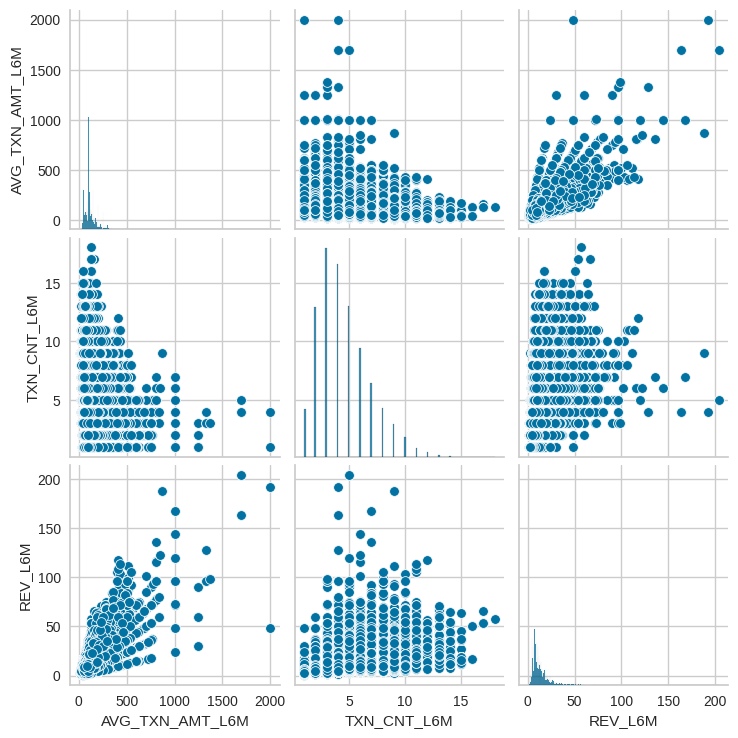

In [ ]:
sns.pairplot(df_clust_)

In [ ]:
df_clust_.describe()

,AVG_TXN_AMT_L6M,TXN_CNT_L6M,REV_L6M
count,107556.000000,107556.000000,107556.000000
mean,126.799829,4.524768,12.627268
std,79.835823,2.311442,9.079250
min,11.500000,1.000000,0.840000
25%,83.300000,3.000000,7.200000
50%,108.000000,4.000000,10.320000
75%,150.000000,6.000000,15.396000
max,2000.000000,18.000000,204.000000


## Feature Scaling

### Min-Max Scaler

In [ ]:
minmax = MinMaxScaler()
df_mm = pd.DataFrame(minmax.fit_transform(df_clust_), columns = df_clust_.columns)
df_mm

,AVG_TXN_AMT_L6M,TXN_CNT_L6M,REV_L6M
0,0.102841,0.235294,0.123449
1,0.066281,0.117647,0.046651
2,0.126628,0.176471,0.120284
3,0.112698,0.411765,0.218523
4,0.043500,0.235294,0.053751
...,...,...,...
107551,0.044506,0.058824,0.019492
107552,0.054564,0.117647,0.038393
107553,0.020820,0.352941,0.039610
107554,0.092281,0.117647,0.064973


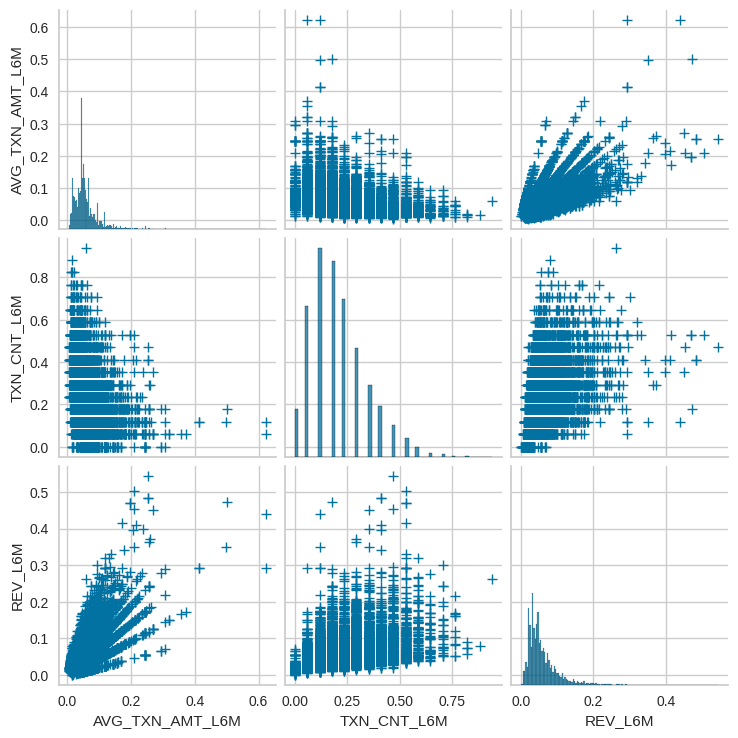

In [ ]:
sns.pairplot(df_mm.sample(frac = 0.1), plot_kws = {'marker': '+','linewidth':1})

### Power Transformer

In [ ]:
ptr = PowerTransformer()
df_pt = pd.DataFrame(ptr.fit_transform(df_clust_), columns = df_clust_.columns)
df_pt

,AVG_TXN_AMT_L6M,TXN_CNT_L6M,REV_L6M
0,1.298119,0.383786,1.491736
1,0.532029,-0.583618,-0.007122
2,1.654891,-0.056437,1.452762
3,1.455636,1.394286,2.323775
4,-0.210189,0.383786,0.213446
...,...,...,...
107551,-0.169924,-1.244877,-1.320063
107552,0.189371,-0.583618,-0.309071
107553,-1.482394,1.096195,-0.260883
107554,1.110569,-0.583618,0.508687


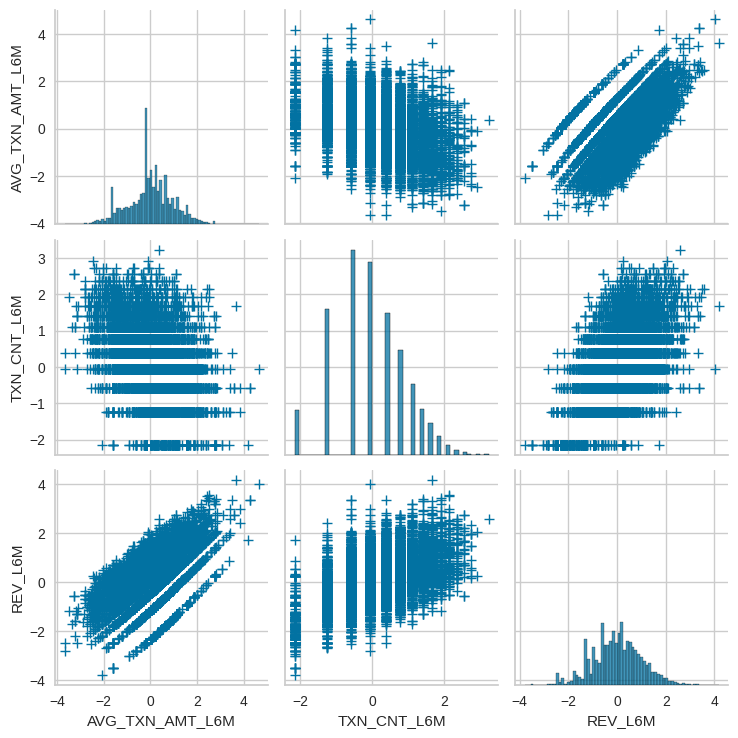

In [ ]:
sns.pairplot(df_pt.sample(round(0.1*df_pt.shape[0])),
            plot_kws={'marker': '+', 'linewidth': 1},
            )

### Robust Scaler

In [ ]:
robust_scaler = RobustScaler()
df_rs = pd.DataFrame(robust_scaler.fit_transform(df_clust_), columns = df_clust_.columns)
df_rs

,AVG_TXN_AMT_L6M,TXN_CNT_L6M,REV_L6M
0,1.619190,0.333333,1.903367
1,0.529235,-0.333333,-0.000293
2,2.328336,0.000000,1.824890
3,1.913043,1.333333,4.260029
4,-0.149925,0.333333,0.175695
...,...,...,...
107551,-0.119940,-0.666667,-0.673499
107552,0.179910,-0.333333,-0.204978
107553,-0.826087,1.000000,-0.174817
107554,1.304348,-0.333333,0.453880


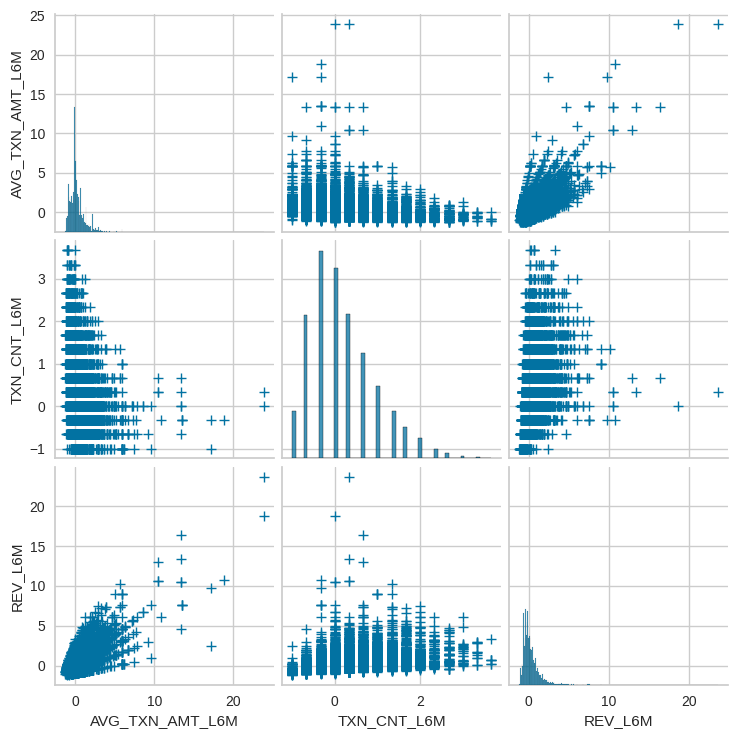

In [ ]:
sns.pairplot(df_rs.sample(round(0.1*df_pt.shape[0])),
            plot_kws={'marker': '+', 'linewidth': 1},
            )

## K-Means Clustering : Initial Approach

In [ ]:
df_approach = df_pt.copy()
df_approach.head()

,AVG_TXN_AMT_L6M,TXN_CNT_L6M,REV_L6M
0,1.298119,0.383786,1.491736
1,0.532029,-0.583618,-0.007122
2,1.654891,-0.056437,1.452762
3,1.455636,1.394286,2.323775
4,-0.210189,0.383786,0.213446


In [ ]:
# Initialize KMeans for 3 clusters
cluster_model = KMeans(n_clusters = 3, random_state = 42, n_init='auto')
cluster_model

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [ ]:
# Fit the data into model
# Setelah declare modelnya, pertemukan dengan datanya
cluster_model.fit(df_pt)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [ ]:
cluster_model.inertia_

138862.87638037006

In [ ]:
# Check up cluster label created by the KMeans
cluster_model.labels_[:20]

array([1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1],
      dtype=int32)

In [ ]:
df1 = df_approach.copy()
df1['cluster'] = cluster_model.labels_
df1

,AVG_TXN_AMT_L6M,TXN_CNT_L6M,REV_L6M,cluster
0,1.298119,0.383786,1.491736,1
1,0.532029,-0.583618,-0.007122,0
2,1.654891,-0.056437,1.452762,1
3,1.455636,1.394286,2.323775,1
4,-0.210189,0.383786,0.213446,2
...,...,...,...,...
107551,-0.169924,-1.244877,-1.320063,0
107552,0.189371,-0.583618,-0.309071,0
107553,-1.482394,1.096195,-0.260883,2
107554,1.110569,-0.583618,0.508687,1


In [ ]:
df1.cluster.value_counts()

1    38664
0    34728
2    34164
Name: cluster, dtype: int64

In [ ]:
df1[df1['cluster'] == 0]

,AVG_TXN_AMT_L6M,TXN_CNT_L6M,REV_L6M,cluster
1,0.532029,-0.583618,-0.007122,0
10,-0.272331,-0.583618,-0.710092,0
14,-0.169924,-0.583618,-0.621810,0
17,-0.169924,-2.142823,-2.478844,0
20,-0.169924,-0.583618,-0.621810,0
...,...,...,...,...
107536,-0.169924,-2.142823,-2.478844,0
107538,0.681383,-1.244877,-0.565429,0
107547,-0.496394,-0.583618,-0.901752,0
107551,-0.169924,-1.244877,-1.320063,0


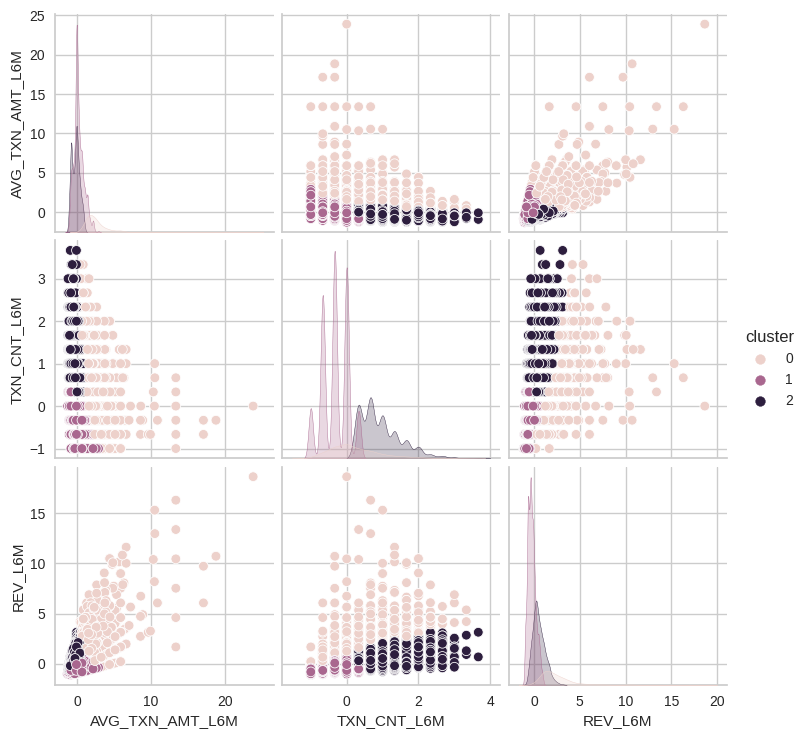

In [ ]:
# Let's re-look into data after clustering
# This take some time, no worries!
sns.pairplot(df1.sample(round(0.1*df1.shape[0])),hue='cluster')

## Determining Number of Clusters

### Elbow Method

In [ ]:
ls_model_kmeans = []
ls_inertia = []

for K in range(1,11):
  kmeanModel = KMeans(n_clusters = K, random_state = 42, n_init = 'auto')
  kmeanModel.fit(df1)
  ls_model_kmeans.append(kmeanModel)
  ls_inertia.append(kmeanModel.inertia_)
  print(kmeanModel.inertia_)


391557.04250807094
239426.38021598902
138862.00364835162
118520.17335068854
102774.24480795296
95909.29476659678
78480.72674686926
70544.06080020766
55675.243815989656
53942.69306107524


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

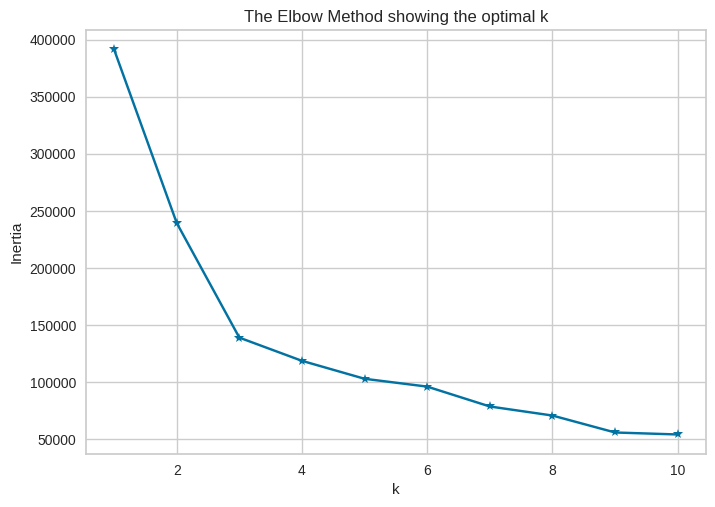

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(1,11), ls_inertia, 'b*-')
ax.set_xlabel('k')
ax.set_ylabel('Inertia')
ax.set_title('The Elbow Method showing the optimal k')

### Silhouette Method

In [ ]:
K = range(2,11)
max_K = max(K)
sil_score = []

for n_clusters in K:
  q, mod = divmod(n_clusters,2)
  print(n_clusters)
  print('q: ',q)
  print('mod',mod)
  print(f'ax[{q-1}][{mod}]')
  print('\n')

2
q:  1
mod 0
ax[0][0]


3
q:  1
mod 1
ax[0][1]


4
q:  2
mod 0
ax[1][0]


5
q:  2
mod 1
ax[1][1]


6
q:  3
mod 0
ax[2][0]


7
q:  3
mod 1
ax[2][1]


8
q:  4
mod 0
ax[3][0]


9
q:  4
mod 1
ax[3][1]


10
q:  5
mod 0
ax[4][0]




For k=2, the average silhouette score is 0.3863874045923377
For k=3, the average silhouette score is 0.46018040300811136
For k=4, the average silhouette score is 0.4133723274799926
For k=5, the average silhouette score is 0.3900527635635296


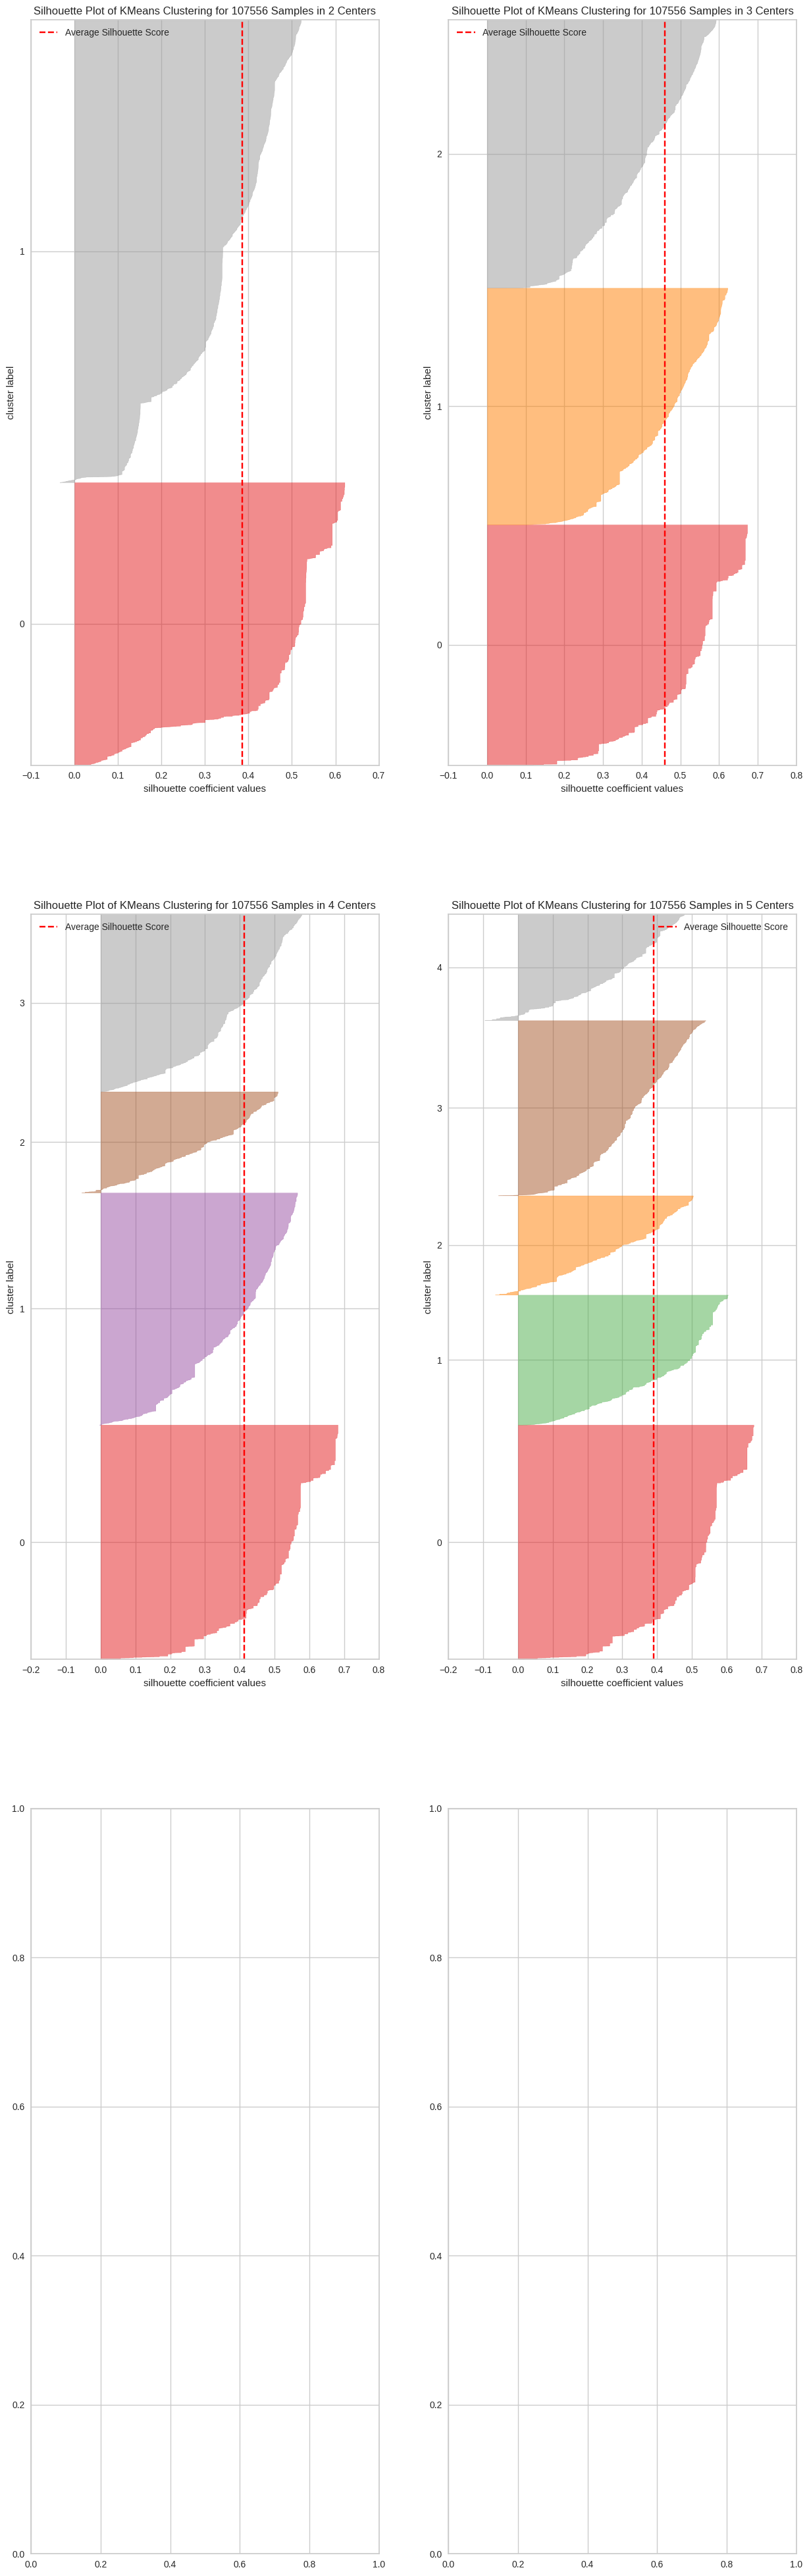

In [ ]:
K = range(2,6)
max_K = max(K)
sil_score = []
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,50))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 1000, n_init='auto')
  kmeanModel.fit(df1.values)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = True, ax = ax[q-1][mod])
  sil.fit(df1.values)
  sil.finalize()
  sil_score.append(sil.silhouette_score_)
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

## Interpreting the Cluster

In [ ]:
cluster_model = KMeans(n_clusters = 3, random_state = 1000, n_init='auto')
cluster_model.fit(df_approach)

KMeans(n_clusters=3, n_init='auto', random_state=1000)

In [ ]:
kmeans3 = df_clust.copy()
kmeans3['cluster'] = cluster_model.labels_
kmeans3

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,PROMO_SENSITIVE,SUM_TXN_AMT_L6M,SUM_PROMO_TXN_AMT_L6M,R_SALES_PROMO_L6M,PROMO_SENSITIVE_L6M,PROMO_SENSITIVE_LTM,ACTIVITY,AGE,REV_L6M,cluster
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,NO,1080.0,400.0,0.370370,NO,NO,ACTIVE,47,25.9200,1
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,YES,429.9,280.0,0.651314,YES,YES,ACTIVE,31,10.3176,0
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,NO,1053.2,800.0,0.759590,YES,NO,ACTIVE,52,25.2768,1
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,YES,1884.8,1457.4,0.773239,YES,YES,ACTIVE,39,45.2352,1
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,YES,490.0,390.0,0.795918,YES,YES,ACTIVE,33,11.7600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,NO,200.0,200.0,1.000000,YES,NO,ACTIVE,43,4.8000,0
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,NO,360.0,120.0,0.333333,NO,NO,ACTIVE,29,8.6400,0
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,YES,370.3,140.1,0.378342,NO,YES,ACTIVE,42,8.8872,2
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,YES,585.0,380.0,0.649573,YES,YES,ACTIVE,36,14.0400,1


In [ ]:
# Describe each groups of cluster
kmeans3.groupby('cluster').agg({
    'AVG_TXN_AMT_L6M' : ('median','min','max'),
    'TXN_CNT_L6M' : ('mean','min','max'),
    'REV_L6M' : ('mean','min','max')
})

AVG_TXN_AMT_L6M               TXN_CNT_L6M               REV_L6M  \
                 median   min     max        mean  min   max       mean   
cluster                                                                   
0                 107.5  30.0   625.0    2.569244  1.0   4.0   7.132977   
1                 145.0  84.3  2000.0    5.259842  1.0  18.0  20.385441   
2                  60.0  11.5    96.7    6.485051  3.0  16.0   9.448822   

                           
             min      max  
cluster                    
0         0.8400   15.000  
1        10.8000  204.000  
2         1.6776   27.252

Additional

In [ ]:
kmeans3.groupby('cluster').agg({
    'AVG_TXN_AMT_L6M' : 'median',
    'TXN_CNT_L6M' : 'mean',
    'REV_L6M' : 'mean',
    'AGE' : 'mean',
    'MOB' : 'mean'
})

,AVG_TXN_AMT_L6M,TXN_CNT_L6M,REV_L6M,AGE,MOB
cluster,,,,,
0,107.5,2.569244,7.132977,39.981682,107.609704
1,145.0,5.259842,20.385441,39.992602,97.588468
2,60.0,6.485051,9.448822,39.935283,96.638014


In [ ]:
kmeans3.groupby('cluster').mean().T

<ipython-input-193-435f87f188a0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kmeans3.groupby('cluster').mean().T


cluster,0,1,2
AVG_TXN_AMT_L6M,122.047262,174.358387,61.725826
AVG_TXN_AMT_LTM,104.429914,142.003257,56.917474
AVG_PROMO_TXN_AMT_L6M,121.222979,172.526152,61.313820
AVG_PROMO_TXN_AMT_LTM,114.236290,163.862671,61.453467
TXN_CNT_L6M,2.569244,5.259842,6.485051
TXN_CNT_LTM,18.048397,20.958834,22.262528
PROMO_TXN_CNT_L6M,1.648639,3.257692,4.016742
PROMO_TXN_CNT_LTM,9.443702,10.439726,11.708375
LAST_TXN_DAY,18.463497,18.478467,17.781939
CNT_PROMO_L6M,5.336455,6.183234,5.694684


## Conclusion

---

Cluster 0 : People with the longest MOB (107 Month), they hava the lowest total of transaction (2-3 txn) and medium average of amount trasaction (107 euro) with the lowest revenue (7 euro) that company can get

Conclusion : longest MOB, low trx, medium average amnt of trx, low revenue


---


Cluster 1 : People with the medium MOB (97 Month), they have big transaction (5 txn) and the biggest average of amount trasaction (145 euro) with the biggest revenue (20 euro) that company can get

Conclusion : medium MOB, big trx, big average amnt of trx, big revenue


---


Cluster 2 : People with the medium MOB (96 Month), they have big transaction (6 txn) and the lowest average of amount trasaction (60 euro) with low revenue (9 euro) that company can get

Conclusion : medium MOB, big trx, low average amnt of trx, low revenue

## Recommendation


---


Based on clustering analysis, we can optimize the cost of promotion by doing ____________ on segment number 2